In [1]:

from neuralogic.nn import get_evaluator
from neuralogic.core import R, Template, V, C, Settings, Transformation, Combination, Aggregation
from neuralogic.core.constructs.function.tree import FunctionContainer
from neuralogic.core.settings import Settings
from neuralogic.dataset import Dataset
from neuralogic.optim import SGD

F = FunctionContainer()
train_dataset = Dataset()
template = Template()

#train_dataset.add_example([R.b[3], R.c[5]])

# just write to template list of operations to perform

#template += (R.a <= (R.b, R.c)) >> F.avg[F.relu(R.b + R.c)]

#template += (R.a <= (R.b, R.c)) | [Combination.SUM, Transformation.RELU, Aggregation.AVG]
#template += (R.a <= (R.b, R.c)) | [Combination.PRODUCT, Transformation.IDENTITY, Aggregation.AVG]
#template += (R.message2(V.X)[5,10] <= (x:= R.message1(V.Y)[10,20], y:= R.edge(V.Y, V.X))) >> F.avg[F.relu(x+y)]
#template += (R.message2(V.X)[5,10] <= (R.message1(V.Y)[10,20], R.edge(V.Y, V.X))) | [Combination.SUM, Transformation.RELU, Aggregation.AVG]
#template += (R.message2(V.X)[5,10] <= (x:= R.message1(V.Y)[10,20], y:= R.edge(V.Y, V.X))) >> F.avg(F.relu(x + y))
# NOT WORKING 
#template += (R.message2(V.X)[5,10] <= F.avg[F.relu(R.message1(V.Y)[10,20] + R.edge(V.Y, V.X))])



C:\Users\kraus\Plocha\BAK\PyNeuraLogicFork\neuralogic\core\builder\builder.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
"""
#R.message1(C.a), R.message1(C.b), R.edge(C.a,C.b), R.edge(C.b,C.a)
train_dataset.add_examples(
    [
        R.message1(C.a), R.message1(C.b), R.messsage1(C.c),
        R.edge(C.a,C.b), R.edge(C.b,C.a), R.edge(C.a, C.c), R.edge(C.c, C.a)
    ]
)
# following line is to be done
# template += R.message2(V.Y) <= F.avg[F.relu(R.message1(V.X) + R.edge(V.Y, V.X))]
template += (R.message2(V.X) <= (R.message1(V.Y), R.edge(V.Y, V.X))) | [Combination.SUM, Transformation.RELU, Aggregation.AVG]
template += (R.predict <= R.message2(V.X)) 
#train_dataset.add_queries([R.predict[1]])
train_dataset.add_queries([
    R.predict(1)[1],
    R.predict(2)[1],
    R.predict(3)[1],
    R.predict(4)[0],
    R.predict(5)[0],
    R.predict(6)[0],
    R.predict(7)[1]
])
template.draw()
"""


'\n#R.message1(C.a), R.message1(C.b), R.edge(C.a,C.b), R.edge(C.b,C.a)\ntrain_dataset.add_examples(\n    [\n        R.message1(C.a), R.message1(C.b), R.messsage1(C.c),\n        R.edge(C.a,C.b), R.edge(C.b,C.a), R.edge(C.a, C.c), R.edge(C.c, C.a)\n    ]\n)\n# following line is to be done\n# template += R.message2(V.Y) <= F.avg[F.relu(R.message1(V.X) + R.edge(V.Y, V.X))]\ntemplate += (R.message2(V.X) <= (R.message1(V.Y), R.edge(V.Y, V.X))) | [Combination.SUM, Transformation.RELU, Aggregation.AVG]\ntemplate += (R.predict <= R.message2(V.X)) \n#train_dataset.add_queries([R.predict[1]])\ntrain_dataset.add_queries([\n    R.predict(1)[1],\n    R.predict(2)[1],\n    R.predict(3)[1],\n    R.predict(4)[0],\n    R.predict(5)[0],\n    R.predict(6)[0],\n    R.predict(7)[1]\n])\ntemplate.draw()\n'

printing metadata
[<neuralogic.core.constructs.function.function.Combination object at 0x0000011AD5934D00>, <neuralogic.core.constructs.function.function.Transformation object at 0x0000011AD59344C0>, <neuralogic.core.constructs.function.function.Aggregation object at 0x0000011AD574DA00>]
WARNING - 962
new map:
{}
initialized map:
{aggregation=avg, transformation=relu, combination=sum}


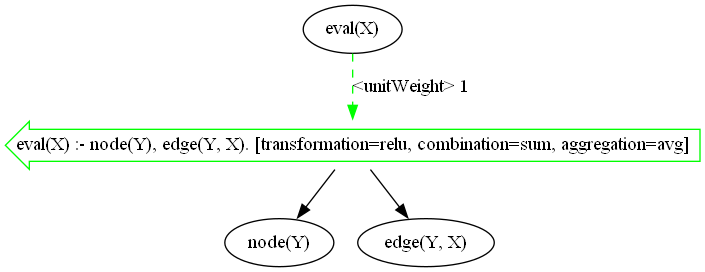

In [3]:
train_dataset.add_examples(
    [
        R.node(C.a), R.node(C.b), R.node(C.c),
        R.edge(C.a, C.b), R.edge(C.b, C.a), R.edge(C.a, C.c), R.edge(C.c, C.a)
    ]
)

template += (R.eval(V.X) <= (R.node(V.Y), R.edge(V.Y, V.X))) | [Combination.SUM, Transformation.RELU, Aggregation.AVG]

train_dataset.add_queries([
    R.eval(C.a),
    R.eval(C.a)
])
template.draw()

In [4]:
# template += (rule with metadata)
# a = b + c



#template += (R.a <= (x:=R.b, y:= R.c)) >> F.identity(x + y)
# expression above has following eval order:
# R.a    ||   x:= R.b    ||     y:= R.c    ||     R.a <= ()   ||    x + y   ||    F.identity  ||    >>   ||   template +=



# [R.relA(V.X) <= (R.relB(V.Y), R.relC(V.Y, V.X))] | [Transformation.SIGMOID]
# (R.message2(V.X)[5,10] <= (R.message1(V.Y)[10,20], R.edge(V.Y, V.X))) | [Transformation.RELU, Aggregation.AVG]
# (R.m2(V.X) <= [x:=R.m1(V.X), y:=R.edge(V.Y, V.X)]) >> F.sigmoid(x + y)

In [5]:
# now useless
#train_dataset.add_queries([R.a[8]])

settings = Settings(optimizer=SGD(), epochs=1)
# calling evaluator with template with rules that have no metadata
neuralogic_evaluator = get_evaluator(template, settings)

build_dataset = neuralogic_evaluator.build_dataset(train_dataset)

for _ in neuralogic_evaluator.train(train_dataset):
    pass

WARNING - 962
new map:
{}
initialized map:
{aggregation=avg, transformation=relu, combination=sum}


Exception: The size of examples 7 doesn't match the size of queries 1

In [ ]:
build_dataset[0].draw()